In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import sin
from math import cos
from math import pi
from math import tan
import pandas as pd
from scipy.optimize import curve_fit
from decimal import Decimal
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def twoDRocket_ODE(state_vectors, t, g, m, IG, a, alpha, rho, S, Cl, Cd):
    # state_vectors = [x, y, V_x, V_y, theta, thetaDot]
    # t             = time vector (s)
    # g             = Gravitational Acceleration m/s^2
    # m             = Mass of the Rocket in kg
    # IG            = Moment of Inertia of the Rocket in kg*m^2
    # a             = Distance between the ceneter of pressure and center of gravity
    # alpha         = Angle of Attack
    # rho           = Air Density
    # S             = Relevant Area for Drag and Lift Force Calculation    
    # Cl            = Lift Coefficient
    # Cd            = Drag Coefficient    
    
    ####################################################
    
    ## Relevant Forces
    # T  = Thrust from Motor in Newtons
    # v  = velocity in body frame or velocity magnitude m/s
    # M  = Mach Number: speed of the object/ speed of the sound in the medium
    # L  = Lift in N (its direction is perpendicular to the veocity vector)
    # D  = Drag in N (its direction is parallel to the velocity vector)
    # Fx = Horizontal force acting on the rocket in body frame in N
    # Fy = Vertical force acting on the rocket in body frame in N
    
    if t < 0.171:
        a = 5.639426
        b = 6.81199993
        T = a*np.exp(b*t) - 5.63942
    elif t >= 0.171 and t < 0.191:
        a = -22.25
        b = 15.94475
        T = a*t + b
    elif t >= 0.191 and t < 0.375:
        a = 0.27878129 
        b = 0.65782577
        T = a*np.exp(b/t) + 2.965
    elif t >= 0.375 and t < 0.746:
        a = 12.06731938       
        b = -41.5398888
        c = 77.00778471
        d = -47.47422896 
        T =a + b*t + c*t**2 + d*t**3
    elif t >= 0.746 and t < 0.786:
        a = 2.475   
        b = 2.37965
        T = a*t+b
    elif t >= 0.786 and t <= 0.86:
        a = 273.0396078
        b = -600.5275055
        c = 329.10706648
        T = a + b*t + c*t**2
    else:
        T = 0
        
    v  = math.sqrt(pow(state_vectors[2],2)+pow(state_vectors[3],2))
    M  = v/351.81
    
    if M <= 0.6:
        Cd = 0.2083333*pow(M,2) - 0.25*M+0.46
    elif M > 0.6 and M <= 0.8:
        Cd = 1.25*pow(M,3) - 2.125*pow(M,2) + 1.2*M + 0.16
    elif M > 0.8 and M <= 0.95:
        Cd = 10.37037*pow(M,3) - 22.88889*pow(M,2) + 16.91111*M - 3.78963
    elif M > 0.95 and M <= 1.05:
        Cd =-30*pow(M,3) + 88.5*pow(M,2) - 85.425*M + 27.51375
        
    L  = 0.5*rho*pow(v,2)*S*Cl
    D  = 0.5*rho*pow(v,2)*S*Cd 
    Fbh = T + L*sin(alpha) - D*cos(alpha)
    Fbv = L*cos(alpha) + D*sin(alpha)
    
    ####################################################

    ## ODE
    dxdt = state_vectors[2]
    dydt = state_vectors[3]
    dvxdt = (Fbh*cos(state_vectors[4]) - Fbv*sin(state_vectors[4]))/m
    if state_vectors[1] == 0:
        dvydt = (Fbh*sin(state_vectors[4]) + Fbv*cos(state_vectors[4])-m*g)/m+ g
    else :
        dvydt = (Fbh*sin(state_vectors[4]) + Fbv*cos(state_vectors[4])-m*g)/m
    dthetadt = state_vectors[5]
    dthetaDotdt = (-L*a*cos(alpha) - D*a*sin(alpha))/IG
    return [dxdt, dydt, dvxdt, dvydt, dthetadt, dthetaDotdt]

In [3]:
## Define Parameters
# state_vectors = [x, y, V_x, V_y, theta, thetaDot]
# x0            = initial states
# tstep         = step size for time vector t in seconds
# t             = time vector (s)
# g             = Gravitational Acceleration m/s^2
# m             = Mass of the Rocket in kg
# IG            = Moment of Inertia of the Rocket in kg*m^2
# a             = Distance between the center of pressure and center of gravity in m
# alpha         = Angle of Attack in radians
# rho           = Air Density in kg/m^3
# S             = Relevant Area for Drag and Lift Force Calculation in m^2  
# Cl            = Lift Coefficient
# Cd            = Drag Coefficient   
# cp            = Center of Pressure location from the nose
# cg            = Center of Gravity from the nose
x0    = [0,0,0,0,0,0]
tstep = 0.0001 # s
t     = np.arange(0,10,tstep)
g     = 9.81 # m/s^2
m     = 0.124 # kg
IG    = 0.007177656 # kg*m^2
cp    = 0.626 # m
cg    = 0.452 # m
a     = abs(cp-cg)
alpha = 0
rho   = 1.225 # kg/m^3 at sea level Temporary value. Change it according to the day I launch it.
S     = 1/4*pi*pow(0.035,2) # m^2
Cl    = 16.85
Cd    = 0 # Cd is calculated again in the ODE function. This varies with speed.

<Axes: title={'center': 'B6 Motor Thrust Curve by John Coker'}, xlabel='Time (s)', ylabel='Thrust (N)'>

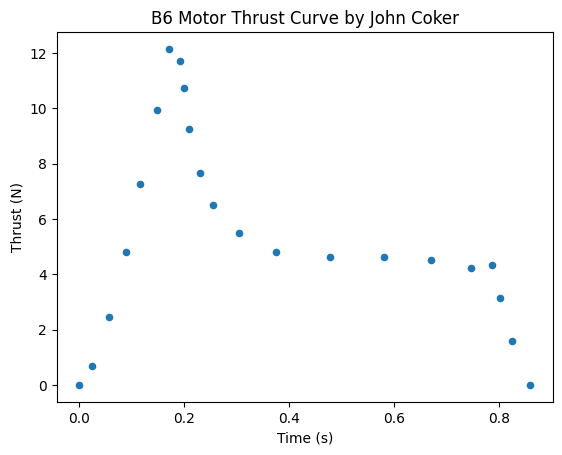

In [4]:
## Thrust Curve
ThrustData = pd.read_csv(r'C:\Users\bktf3\Desktop\rocket\simulation\B6motorThrustDatabyJohnCoker.csv', skiprows=3)
ThrustData.set_index('Time (s)')
ThrustData.plot.scatter(title = 'B6 Motor Thrust Curve by John Coker', x = 'Time (s)', y = 'Thrust (N)', xlabel = ('Time (s)'), ylabel = ('Thrust (N)')) 

C:\Users\bktf3\AppData\Local\Temp\ipykernel_24812\1524238768.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  constants       = curve_fit(linear, ThrustData[i:i+2,0], ThrustData[i:i+2,1])


Text(0, 0.5, 'Thrust (N)')

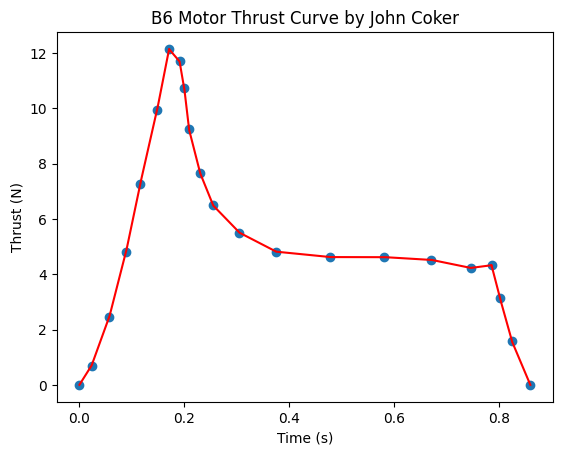

In [5]:
# ## Curve Fit Thrust Curve
ThrustData = pd.DataFrame(ThrustData).to_numpy()
fit = []
curvetime = []
# Type of curve I am going to be fitting for the thrust curve
def linear(x, a,b):
    return a*x + b  
for i in range(0,len(ThrustData)-1):
    timeForCurveFit = np.arange(ThrustData[i,0],ThrustData[i+1,0]+tstep,tstep)
    constants       = curve_fit(linear, ThrustData[i:i+2,0], ThrustData[i:i+2,1])
    a = constants[0][0]
    b = constants[0][1]
    for j in timeForCurveFit:
        fit.append(linear(j, a,b))
        curvetime.append(j)
fit = np.array(fit)
curvetime = np.array(curvetime)

plt.scatter(ThrustData[:,0],ThrustData[:,1])
plt.plot(curvetime,fit, color ='red')
plt.title('B6 Motor Thrust Curve by John Coker')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')

[5.639426   6.81199993]
[0.    0.023 0.057 0.089 0.116 0.148 0.171]
[0.000e+00 1.000e-04 2.000e-04 ... 1.708e-01 1.709e-01 1.710e-01]
0.171
5.999381525789715e-06


Text(0, 0.5, 'Newton (N)')

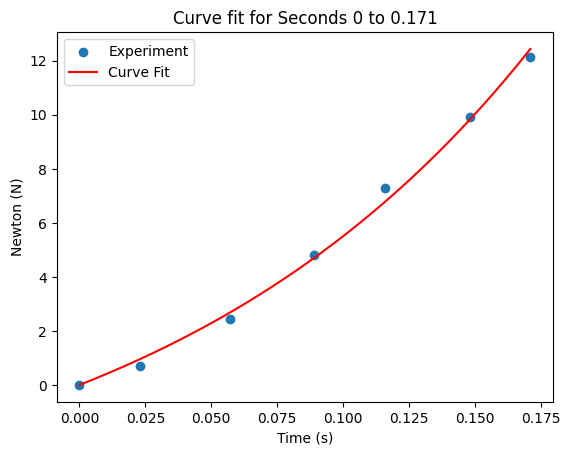

In [6]:
## Second attempt at fitting Thrust Curve to be used in the ODE
def func(x, a, b):
    return a*np.exp(b*x)-5.63942
popt, pcov = curve_fit(func,ThrustData[0:7,0],ThrustData[0:7,1])
print(popt)
timeForCurveFit = np.arange(ThrustData[0,0],ThrustData[6,0]+tstep,tstep)
y =func(timeForCurveFit,*popt)
plt.scatter(ThrustData[0:7,0],ThrustData[0:7,1])
plt.plot(timeForCurveFit,y,'r')
print(ThrustData[0:7,0])
print(timeForCurveFit)
print(ThrustData[6,0])
print(y[0])
plt.title('Curve fit for Seconds 0 to 0.171')
plt.legend(['Experiment', 'Curve Fit'])
plt.xlabel('Time (s)')
plt.ylabel('Newton (N)')

[-22.25     15.94475]
0.1909999999999978
0.191


C:\Users\bktf3\AppData\Local\Temp\ipykernel_24812\1162430726.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func,ThrustData[6:8,0],ThrustData[6:8,1])


Text(0, 0.5, 'Newton (N)')

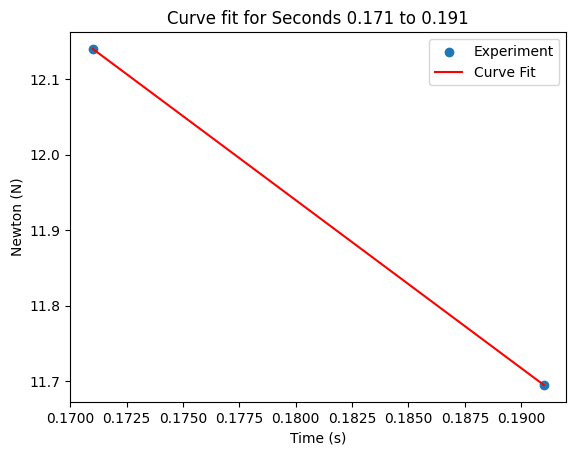

In [7]:
## Second attempt at fitting Thrust Curve to be used in the ODE
def func(x, a, b):
    return a*x+b
popt, pcov = curve_fit(func,ThrustData[6:8,0],ThrustData[6:8,1])
print(popt)
timeForCurveFit = np.arange(ThrustData[6,0],ThrustData[7,0]+tstep,tstep)
y =func(timeForCurveFit,*popt)
plt.scatter(ThrustData[6:8,0],ThrustData[6:8,1])
plt.plot(timeForCurveFit,y,'r')
# print(ThrustData[0:7,0])
# print(timeForCurveFit)
print(timeForCurveFit[-1])
print(ThrustData[7,0])
plt.title('Curve fit for Seconds 0.171 to 0.191')
plt.legend(['Experiment', 'Curve Fit'])
plt.xlabel('Time (s)')
plt.ylabel('Newton (N)')

[0.27878129 0.65782577]
[0.191 0.2   0.209 0.23  0.255 0.305 0.375]
0.37499999999997974
0.375
11.695182516523984


Text(0, 0.5, 'Newton (N)')

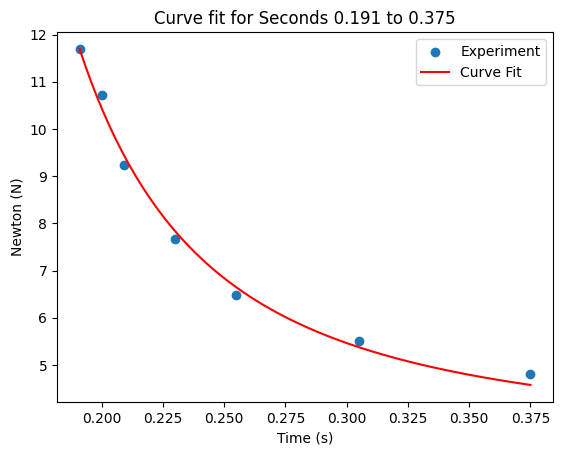

In [8]:
def func(x, a, b):
    return a*np.exp(b/x)+2.965
popt, pcov = curve_fit(func,ThrustData[7:14,0],ThrustData[7:14,1])
print(popt)
timeForCurveFit = np.arange(ThrustData[7,0],ThrustData[13,0]+tstep,tstep)
y =func(timeForCurveFit,*popt)
plt.scatter(ThrustData[7:14,0],ThrustData[7:14,1])
plt.plot(timeForCurveFit,y,'r')
print(ThrustData[7:14,0])
print(timeForCurveFit[-1])
print(ThrustData[13,0])
print(y[0])
plt.title('Curve fit for Seconds 0.191 to 0.375')
plt.legend(['Experiment', 'Curve Fit'])
plt.xlabel('Time (s)')
plt.ylabel('Newton (N)')

[ 12.06731938 -41.5398888   77.00778471 -47.47422896]
[0.375 0.477 0.58  0.671 0.746]
0.7459999999999591
0.746
4.815557013511123


Text(0, 0.5, 'Newton (N)')

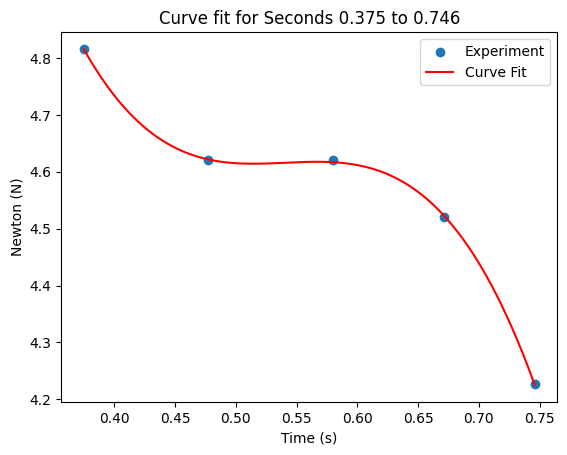

In [9]:
def func(x, a, b,c,d):
    return a+b*x+c*x**2+d*x**3
popt, pcov = curve_fit(func,ThrustData[13:18,0],ThrustData[13:18,1])
print(popt)
timeForCurveFit = np.arange(ThrustData[13,0],ThrustData[17,0]+tstep,tstep)
y =func(timeForCurveFit,*popt)
plt.scatter(ThrustData[13:18,0],ThrustData[13:18,1])
plt.plot(timeForCurveFit,y,'r')
print(ThrustData[13:18,0])
print(timeForCurveFit[-1])
print(ThrustData[17,0])
print(y[0])
plt.title('Curve fit for Seconds 0.375 to 0.746')
plt.legend(['Experiment', 'Curve Fit'])
plt.xlabel('Time (s)')
plt.ylabel('Newton (N)')

[2.475   2.37965]
[0.746 0.786]
0.7860999999999956
0.786
4.226


C:\Users\bktf3\AppData\Local\Temp\ipykernel_24812\4102687795.py:3: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func,ThrustData[17:19,0],ThrustData[17:19,1])


Text(0, 0.5, 'Newton (N)')

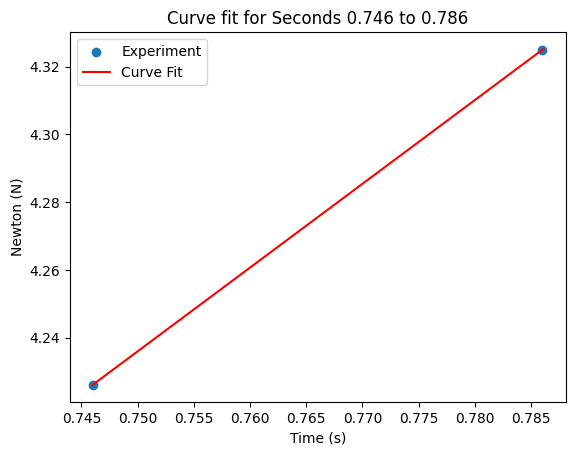

In [10]:
def func(x, a, b):
    return a*x+b
popt, pcov = curve_fit(func,ThrustData[17:19,0],ThrustData[17:19,1])
print(popt)
timeForCurveFit = np.arange(ThrustData[17,0],ThrustData[18,0]+tstep,tstep)
y =func(timeForCurveFit,*popt)
plt.scatter(ThrustData[17:19,0],ThrustData[17:19,1])
plt.plot(timeForCurveFit,y,'r')
print(ThrustData[17:19,0])
print(timeForCurveFit[-1])
print(ThrustData[18,0])
print(y[0])
plt.title('Curve fit for Seconds 0.746 to 0.786')
plt.legend(['Experiment', 'Curve Fit'])
plt.xlabel('Time (s)')
plt.ylabel('Newton (N)')

[ 273.0396078  -600.5275055   329.10706648]
[0.786 0.802 0.825 0.86 ]
0.8599999999999919
0.86
4.346017714717419


Text(0, 0.5, 'Newton (N)')

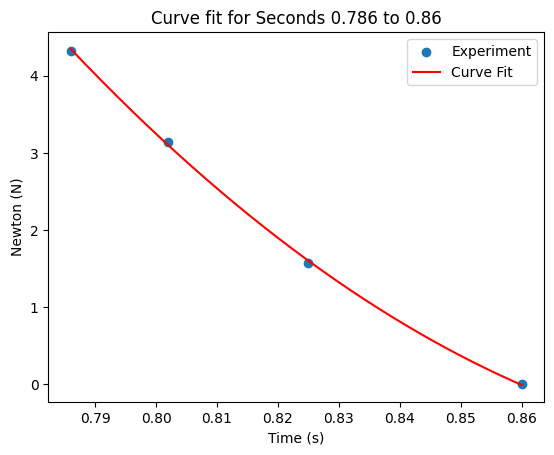

In [11]:
def func(x, a, b,c):
    return a + b*x + c*x**2
popt, pcov = curve_fit(func,ThrustData[18:22,0],ThrustData[18:22,1])
print(popt)
timeForCurveFit = np.arange(ThrustData[18,0],ThrustData[21,0]+tstep,tstep)
y =func(timeForCurveFit,*popt)
plt.scatter(ThrustData[18:22,0],ThrustData[18:22,1])
plt.plot(timeForCurveFit,y,'r')
print(ThrustData[18:22,0])
print(timeForCurveFit[-1])
print(ThrustData[21,0])
print(y[0])
plt.title('Curve fit for Seconds 0.786 to 0.86')
plt.legend(['Experiment', 'Curve Fit'])
plt.xlabel('Time (s)')
plt.ylabel('Newton (N)')

In [ ]:
solution = odeint(twoDRocket_ODE, x0, t, args = (g, m, IG, a, alpha, rho, S, Cl, Cd))

In [ ]:
plt.plot(t,solution[:,0])

plt.legend(['x'])

In [ ]:
plt.plot(t,solution[:,1])
plt.legend('y')

In [ ]:
plt.plot(t,solution[:,2])
plt.legend(['Vx'])

In [ ]:
plt.plot(t,solution[:,3])
plt.legend(['Vy'])

In [ ]:
plt.plot(t,solution[:,4])
plt.plot(t,solution[:,5])
plt.legend(['Theta','ThetaDot'])